In [1]:
import requests
import re
from bs4 import BeautifulSoup

page =requests.get("https://www.imdb.com/list/ls091520106/")

soup2 =BeautifulSoup(page.content, 'html.parser')

In [2]:
films = soup2.find('div',{'class' : 'lister-list'})

f_links = []
for x in films.find_all('a', href=True):
    f_links.append(x['href'])

f_linksC = []
for i in range(1, len(f_links) - 1):
    if f_links[i] != '#void':
            if f_links[i] != f_links[i + 1]:
                if f_links[i][1] != 'n':
                    f_linksC.append(f_links[i])

filmingDates = []

loc = '/locations?ref_=tt_dt_dt'

for i in range(100):
    locUrl = 'https://www.imdb.com/' + f_linksC[i][1:-1] + loc
    locPage = requests.get(locUrl)
    locSoup = BeautifulSoup(locPage.content, 'html.parser')
    fd = locSoup.find('li', {'class':"ipl-zebra-list__item"})
    if fd:
        filmingDates.append(fd.text.strip())
    else:
        filmingDates.append('Not given.')

In [122]:
titles = []
descriptions = []
releases = []
directors = []
ratings = []
durations = []
genres = []
stars = []


for i in range(1, 201, 2):
    child = list(films.children)[i]
    filmString = child.text.replace('\n', "")
    #. \ + * ? [ ^ ] $ ( ) { } = !  | : -  
    flist = re.split("\||  ", filmString)
    fset = [x for x in flist if x != '']
    if 'Metascore' in fset:
        fset.remove('Metascore')
    if len(fset) > 1:
        t = fset[0]
        t = t[t.find('.') + 1:]
        rel = t[::-1][t[::-1].find(')') + 1:][:4][::-1]
        t = t[:t.find('(')]
        releases.append(int(rel))
        titles.append(t)
        durations.append(int(fset[1][:fset[1].find(' ')]))
        genres.append(fset[2])
            
        r = fset[3][:5]
        for l in r:
            if l.isalpha():
                r = r.replace(l,"")
                if r[1] != '.':
                    r = '9.0'

        ratings.append(float(r))
        descriptions.append(fset[4])
        directors.append(fset[5][9:])
        s = fset[6][7:]
        s = s[::-1]
        s = s[s.find('V') + 1:]
        stars.append(s[::-1])

top_100 = {'title' : titles, 'description' : descriptions, 'release' : releases, 'director' :  directors, 'rating' : ratings, 'duration' : durations, 'genre' : genres, 'stars' : stars, 'filming dates' : filmingDates}

print(top_100)
df = pd.DataFrame(top_100, index = list(range(1,101)))

df





{'title': ['The Shawshank Redemption', 'The Godfather', 'The Godfather: Part II', 'The Dark Knight', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Good, the Bad and the Ugly', 'Fight Club', 'Joker', 'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Lord of the Rings: The Two Towers', 'The Matrix', "One Flew Over the Cuckoo's Nest", 'Goodfellas', 'Seven Samurai', 'Se7en', 'City of God', 'Life Is Beautiful', 'The Silence of the Lambs', 'Star Wars: Episode IV - A New Hope', "It's a Wonderful Life", 'Saving Private Ryan', 'Spirited Away', 'The Green Mile', 'Léon: The Professional', 'Hara-Kiri', 'Interstellar', 'The Usual Suspects', 'The Lion King', 'American History X', 'Back to the Future', 'The Pianist', 'Modern Times', 'Terminator 2: Judgment Day', 'The Intouchables', 'Psycho', 'Gladiator', 'City Lights', 'The Departed', 'Whiplash', 'Once Upo

,title,description,release,director,rating,duration,genre,stars,filming dates
1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994,Frank Darabont,9.3,142,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",16 June 1993 - 10 September 1993
2,The Godfather,The aging patriarch of an organized crime dyna...,1972,Francis Ford Coppola,9.2,175,"Crime, Drama","Marlon Brando, Al Pacino, James Caan, Diane Ke...",29 March 1971 - 6 August 1971
3,The Godfather: Part II,The early life and career of Vito Corleone in ...,1974,Francis Ford Coppola,9.0,202,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall, Dian...",1 October 1973 - 19 June 1974
4,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M...",18 April 2007 - 11 November 2007
5,12 Angry Men,A jury holdout attempts to prevent a miscarria...,1957,Sidney Lumet,9.0,96,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",June 1956 - July 1956
...,...,...,...,...,...,...,...,...,...
96,North by Northwest,A New York City advertising executive goes on ...,1959,Alfred Hitchcock,8.3,136,"Adventure, Mystery, Thriller","Cary Grant, Eva Marie Saint, James Mason, Jess...",11 November 2011
97,A Clockwork Orange,"In the future, a sadistic gang leader is impri...",1971,Stanley Kubrick,8.3,136,"Crime, Drama, Sci-Fi","Malcolm McDowell, Patrick Magee, Michael Bates...",27 August 1958 - 24 December 1958
98,Snatch,"Unscrupulous boxing promoters, violent bookmak...",2000,Guy Ritchie,8.3,102,"Comedy, Crime","Jason Statham, Brad Pitt, Benicio Del Toro, De...",7 September 1970 - February 1971
99,Amélie,Amélie is an innocent and naive girl in Paris ...,2001,Jean-Pierre Jeunet,8.3,122,"Comedy, Romance","Audrey Tautou, Mathieu Kassovitz, Rufus, Lorel...",18 October 1999 - 12 December 1999


<AxesSubplot:xlabel='release', ylabel='rating'>

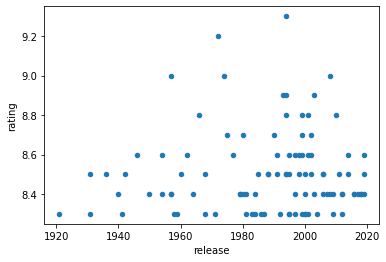

In [114]:
    #pandas stuff

#pandas dataframe with all
#normalized max_min (Rating/Duration (minutes))
#normalized0_1 (Rating / time to film)
import pandas as pd

#x normalized = (x – x minimum) / (x maximum – x minimum)



rds = []
rts = []
for i in range(0, 100):
        rd = ratings[i] / durations[i]
        rds.append(rd)

nrds = [x/max(rds) for x in rds]

df['Rating / Duration'] = nrds

import matplotlib.pyplot as plt

vis_rr = df.plot(kind='scatter', x='release', y='rating')
vis_rr


([<matplotlib.axis.XTick at 0x7f0a4bf1f390>,
 [Text(0, 0, 'Frank Darabont'),
  Text(1, 0, 'Francis Ford Coppola'),
  Text(2, 0, 'Christopher Nolan'),
  Text(3, 0, 'Sidney Lumet'),
  Text(4, 0, 'Steven Spielberg'),
  Text(5, 0, 'Peter Jackson'),
  Text(6, 0, 'Quentin Tarantino'),
  Text(7, 0, 'Sergio Leone'),
  Text(8, 0, 'David Fincher'),
  Text(9, 0, 'Todd Phillips'),
  Text(10, 0, 'Robert Zemeckis'),
  Text(11, 0, 'Irvin Kershner'),
  Text(12, 0, ':Lana Wachowski, Lilly Wachowski'),
  Text(13, 0, 'Milos Forman'),
  Text(14, 0, 'Martin Scorsese'),
  Text(15, 0, 'Akira Kurosawa'),
  Text(16, 0, ':Fernando Meirelles, Kátia Lund'),
  Text(17, 0, 'Roberto Benigni'),
  Text(18, 0, 'Jonathan Demme'),
  Text(19, 0, 'George Lucas'),
  Text(20, 0, 'Frank Capra'),
  Text(21, 0, 'Hayao Miyazaki'),
  Text(22, 0, 'Luc Besson'),
  Text(23, 0, 'Masaki Kobayashi'),
  Text(24, 0, 'Bryan Singer'),
  Text(25, 0, ':Roger Allers, Rob Minkoff'),
  Text(26, 0, 'Tony Kaye'),
  Text(27, 0, 'Roman Polanski'),


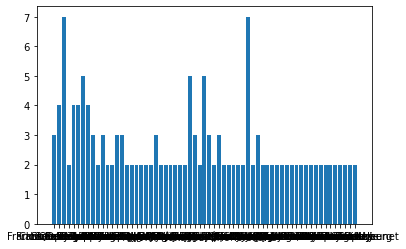

In [121]:
dirmov = {}
for d in df['director']:
    dirmov[d] = 1

for d in df['director']:
    dirmov[d] += 1

dm =plt.bar(range(len(dirmov)), list(dirmov.values()), align='center')
dm =plt.xticks(range(len(dirmov)), list(dirmov.keys()))
dm